**Trabalho 2 de algoritmo e estrutura de dados 2**<br>
Bruno Gabriel Justino dos Santos<br>
Maria Vitória Ribeiro Mendes<br>
2021

Referências:
criar: https://networkx.org/documentation/networkx-1.9/tutorial/tutorial.html<br>
qual tipo usar: https://networkx.org/documentation/networkx-1.9/reference/<br>classes.html -> acho que no nosso caso é digraph<br>
introdução: https://networkx.org/documentation/networkx-1.9/reference/introduction.html<br>
exemplos de algoritmos: https://networkx.org/documentation/networkx-1.9/examples/index.html<br>
mais: https://networkx.org/documentation/networkx-1.9/reference/index.html<br>
Sobre tt: https://medium.com/web-mining-is688-spring-2021/twitter-networkx-graph-analysis-cef99c23fce9<br>
https://medium.com/future-vision/visualizing-twitter-interactions-with-networkx-a391da239af5<br>
https://bertwagner.com/posts/using-pythons-networkx-for-twitter-graph-analysis/<br>

Dvisão de tarefas:<br>
Mavi - criação do grafo, tópicos 1,2,3,4,5, betweenness centrality, eingenvector centrality, parte da fase 2<br>
Bruno - tópicos 6,7,8,9, edição do documento, parte da fase 2<br>

In [ ]:

from operator import itemgetter
import networkx as nx
from networkx.algorithms import community

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


Friends/follower graph (directed)

In [ ]:
LA = "/content/drive/MyDrive/4-SEMESTRE/AED2/projeto2/test1000k"

Read adjacent list format and put it into a graph

In [ ]:
G1 = nx.DiGraph(nx.read_adjlist(LA))


In [ ]:
G1.is_directed()

True


Fase 1
---

Fase 1: Nesta fase espera-se uma caracteriza ̧c ̃ao da LA, ou seja, espera-se que a rede possa
ser caracterizada apresentando-se as s seguintes caracter ́ısticas:<br>
(1) Tipo de rede (direcionada ou n ̃ao, ponderada ou n ̃ao);<br>
(2) N ́umero de n ́os e arestas;<br>
(3) Grau m ́aximo, m ́edio, m ́ınimo e m ́edio;<br>
(4) Densidade da rede;<br>
(5) N ́umero m ́edio de triˆangulos;<br>
(6) M ́edia do coeficiente de agrupamento (clustering);<br>
(7) Diˆametro da rede; e<br>
(8) N ́umero de componentes conexos fracos, al ́em do n ́umero de n ́os e arestas para o
maior destes componentes;<br>
(9) N ́umero de componentes conexos fortes, al ́em do n ́umero de n ́os e arestas para o
maior destes componentes.<br>

1) Rede: direcionada e não ponderada

In [ ]:
print('Nodes: ',G1.number_of_nodes())

Nodes:  134572


2) Número de nós e arestas

In [ ]:
print('Edges: ',G1.size())

Edges:  1888275


3) Grau: máximo, médio, mínimo

In [ ]:
# degree: The node degree is the number of edges adjacent to the node. Returns tuples of the form: (node, degree)
degrees = list(G1.degree())  # sort, and get the mean value

from operator import itemgetter
degrees.sort(key=itemgetter(1) , reverse = True)
print("Max degree: ",degrees[0]) # max
print("Top 20: ",degrees[:20])
print("Min degree: ",degrees[-1]) # min
print("Top 20: ",degrees[:-20])
sum_degrees = sum(degree[1] for degree in degrees)
print("Sum of degrees: ",sum_degrees)
mean = sum_degrees/len(degrees)
print("Mean of degrees: ",mean) # mean

# in degree: The node in_degree is the number of edges pointing to the node.
# out degree: The node out_degree is the number of edges pointing out of the node. 
   



Max degree:  ('6', 5910)
Top 20:  [('6', 5910), ('220', 5694), ('8', 5068), ('301', 4958), ('88', 4660), ('138', 4612), ('4', 4332), ('206', 4052), ('1062', 3808), ('1503', 3712), ('352', 3614), ('327', 3370), ('677', 3194), ('211', 3154), ('750', 2962), ('27', 2896), ('383', 2790), ('1267', 2728), ('253', 2656), ('407', 2656)]
Min degree:  ('134572', 2)
Top 20:  [('6', 5910), ('220', 5694), ('8', 5068), ('301', 4958), ('88', 4660), ('138', 4612), ('4', 4332), ('206', 4052), ('1062', 3808), ('1503', 3712), ('352', 3614), ('327', 3370), ('677', 3194), ('211', 3154), ('750', 2962), ('27', 2896), ('383', 2790), ('1267', 2728), ('253', 2656), ('407', 2656), ('317', 2580), ('1988', 2562), ('26', 2486), ('10', 2468), ('81', 2432), ('34', 2370), ('816', 2366), ('408', 2302), ('32', 2286), ('349', 2248), ('50', 2246), ('891', 2202), ('759', 2192), ('403', 2154), ('385', 2144), ('979', 2108), ('1274', 2088), ('330', 2082), ('93', 2064), ('335', 2058), ('134', 1980), ('44', 1968), ('998', 1962),

In degree

In [ ]:
in_degrees = list(G1.in_degree())  # sort, and get the mean value

from operator import itemgetter
in_degrees.sort(key=itemgetter(1) , reverse = True)
print("Max in degree:",in_degrees[0]) # max
print("Min in degree:",in_degrees[-1]) # min
print("Top 20+: ",in_degrees[:20])
print("Top 20-: ",in_degrees[-20:])
sum_in_degrees = sum(in_degree[1] for in_degree in in_degrees)
print("Sum of in degrees:",sum_in_degrees)
mean_in_degree = sum_in_degrees/len(in_degrees)
print("Mean in degrees:",mean_in_degree) # mean

Out degree

In [ ]:
out_degrees = list(G1.out_degree())  # sort, and get the mean value

from operator import itemgetter
out_degrees.sort(key=itemgetter(1) , reverse = True)
print("Max out degree:",out_degrees[0]) # max
print("Min out degree:",out_degrees[-1]) # min
print("Top 20+: ",out_degrees[:20])
print("Top 20-: ",out_degrees[-20:])
sum_out_degrees = sum(out_degree[1] for out_degree in out_degrees)
print("Sum out degrees:",sum_out_degrees)
mean_out_degree = sum_out_degrees/len(out_degrees)
print("Mean out degrees:",mean_out_degree) # mean

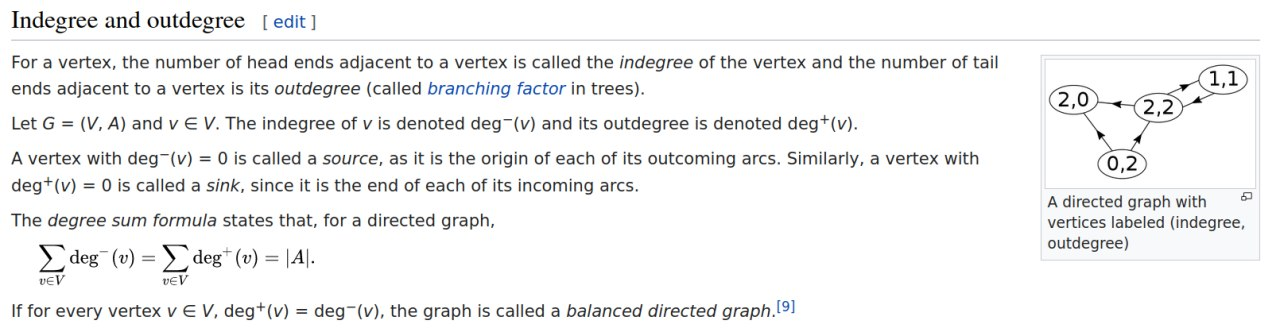

4) Densidade

In [ ]:

"""
Dado um grafo direcionado (é o caso desse trabalho), a densidade é: m/n(n-1)
https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.density.html

"""
nx.classes.function.density(G1)


0.00010426992393085915

Verificando

In [ ]:
G1.size()/(G1.number_of_nodes()*(G1.number_of_nodes()-1))

0.00010426992393085915

5) Número de triângulos

In [ ]:
# O calculo numero de triangulos em grafos direcionados é um recurso indisponível na biblioteca Networkx
# Assim, esse grafo foi passado para o formato de não direcionado a fim de fazer um cálculo do número de triângulos

G_undirected = G1.to_undirected()
num_triangles = nx.triangles(G_undirected)
sum_triangles = sum(num_triangles.values())
mean_triangles = sum_triangles/len(num_triangles.values())

print('Sum of all the number of triangles: ',sum_triangles)
print('Mean: ',mean_triangles)

Sum of all the number of triangles:  6201504
Mean:  46.08316737508546


In [ ]:
"""
for edge in G1.edges():
  for u in edge[0]:
    for v in edge[1]:
      if(edge == (u,v)):
        for edge in G1.edges():
          # procurar vertice conectado a u e v
          talvez usando a função common neighbor dê pra fazer isso ein: https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.common_neighbors.html#networkx.classes.function.common_neighbors

          for each u v  there is a triangle for each common node
          no fim divide por 3
          show


"""  

'\nfor edge in G1.edges():\n  for u in edge[0]:\n    for v in edge[1]:\n      if(edge == (u,v)):\n        for edge in G1.edges():\n          # procurar vertice conectado a u e v\n          talvez usando a função common neighbor dê pra fazer isso ein: https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.common_neighbors.html#networkx.classes.function.common_neighbors\n\n          for each u v  there is a triangle for each common node\n          no fim divide por 3\n          show\n\n\n'

6) Média do coeficiente de agrupamento (clustering)

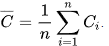

In [ ]:
cof_clustering = nx.clustering(G1)
value=sum(cof_clustering.values())

media_clustering = value/G1.number_of_nodes()

print(media_clustering)


0.12055385220285039


7) Diâmetro da rede

In [ ]:
nx.diameter(G1)

NetworkXError: ignored

8) Número de componentes conexos fracos, além do número de npos e arestas para o
maior destes componentes

In [ ]:
r=nx.number_weakly_connected_components(G1)
print("weakly_connected:", r)


componentes = nx.weakly_connected_components(G1)
maior_element = max(componentes, key=len)
print("maior: ",maior_element)
subgraph_weakly= G1.subgraph(maior_element)



print("nodes_size:",subgraph_weakly.number_of_nodes())
print("edges_size:",subgraph_weakly.number_of_edges())

weakly_connected: 26
maior:  {'105492', '21725', '60112', '24835', '24357', '104357', '17984', '61219', '78389', '85552', '15412', '125665', '52662', '68556', '73433', '66516', '71179', '21319', '109706', '621', '56910', '61070', '83388', '56987', '111077', '91795', '65945', '102178', '109496', '12154', '35862', '116268', '6563', '21204', '89186', '55396', '112251', '131124', '30332', '112592', '83796', '14677', '19301', '88898', '123341', '63115', '126565', '3473', '1167', '61514', '99473', '70351', '49337', '78070', '59583', '106249', '95580', '12292', '89760', '102782', '105541', '76392', '104325', '39746', '9946', '49786', '107013', '134558', '111063', '33807', '12976', '98607', '84303', '96170', '124664', '13431', '27511', '50305', '107196', '46745', '16982', '107028', '134563', '27083', '112467', '116056', '15980', '35663', '102929', '101942', '89137', '82308', '40674', '3718', '119759', '111293', '70051', '100538', '89368', '7415', '71627', '128415', '77822', '51889', '82251', '

9) Número de componentes conexos fortes, além do número de nós e arestas para o maior destes componentes.

In [ ]:
r=nx.number_strongly_connected_components(G1)
print("strongly_connected:",r)

componentes = nx.strongly_connected_components(G1)
maior_element = max(componentes, key=len)
print("maior: ",maior_element)

subgraph_strongly= G1.subgraph(maior_element)

print("nodes_size:",subgraph_strongly.number_of_nodes())
print("edges_size:",subgraph_strongly.number_of_edges())

strongly_connected: 26
maior:  {'105492', '21725', '60112', '24835', '24357', '104357', '61219', '17984', '85552', '78389', '15412', '125665', '52662', '68556', '73433', '66516', '71179', '21319', '109706', '621', '61070', '56910', '83388', '56987', '91795', '111077', '102178', '65945', '109496', '12154', '35862', '116268', '6563', '21204', '89186', '55396', '112251', '131124', '30332', '112592', '83796', '19301', '88898', '14677', '123341', '63115', '126565', '3473', '1167', '61514', '99473', '70351', '49337', '78070', '59583', '106249', '95580', '12292', '89760', '102782', '105541', '76392', '104325', '39746', '49786', '9946', '107013', '134558', '111063', '84303', '96170', '98607', '12976', '33807', '124664', '13431', '27511', '50305', '107196', '46745', '16982', '107028', '134563', '27083', '112467', '116056', '15980', '35663', '102929', '101942', '89137', '82308', '40674', '3718', '119759', '111293', '100538', '70051', '89368', '128415', '71627', '77822', '7415', '51889', '82251',

# Nós mais importantes

**Graus**<br> ISSO VAI MUDAR QND RODAR PRA TUDO\
Do item 3 da Fase 1, sabemos qual nó tem maior grau<br>
*Degree*<br>
Max degree:  ('8312', 1576)\
Min degree:  ('20023', 2)\
*In-degree*<br>
Max in degree: ('8312', 788)\
Min in degree: ('20023', 1)\
*Out-degree*<br>
Max out degree: ('8312', 788)\
Min out degree: ('20023', 1)

A partir disso conclui-se que o nó 8312 é o mais conectado, pois é o que tem mais relacionamentos friend/follower.
Analogamente, o nó 20023 é o mais fracamente conectado.

Centrality measures:<br>
1- https://networkx.org/documentation/networkx-1.9/reference/algorithms.centrality.html<br>
2-https://networkx.org/nx-guides/content/algorithms/assortativity/correlation.html<br>
3-https://networkx.org/nx-guides/content/algorithms/dag/index.html<br>
4- THIS: https://networkx.org/documentation/stable/referencealgorithms/centrality.html<br>


In [ ]:
nx.info(G1)

'DiGraph with 134572 nodes and 1888275 edges'

betweenness centrality

In [ ]:
bc = nx.betweenness_centrality(G1)

In [ ]:
from operator import itemgetter
bc_sorted = sorted(bc.items(), key = itemgetter(1))
print("min ",bc_sorted[0],"| max: ", bc_sorted[-1])

# https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html

closeness centrality<br>
https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.closeness_centrality.html

In [ ]:
c_c = nx.closeness_centrality(G1)

In [ ]:
from operator import itemgetter
c_c_sorted = sorted(c_c.items(), key = itemgetter(1))
print("min ",c_c_sorted[0],"| max: ", c_c_sorted[-1])

eigenvector centrality

In [ ]:
eng_cent = nx.eigenvector_centrality(G1)

In [ ]:
from operator import itemgetter
eng_cent_sorted = sorted(eng_cent.items(), key = itemgetter(1))
print("min ",eng_cent_sorted[0],"| max: ", eng_cent_sorted[-1])

Pagerank<br>
https://networkx.org/documentation/networkx-1.7/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

In [ ]:
pg_rank = nx.pagerank(G1)
print(pg_rank)

In [ ]:
from operator import itemgetter
pg_rank_sorted = sorted(pg_rank.items(), key = itemgetter(1))
print("min ",pg_rank_sorted[0],"| max: ", pg_rank_sorted[-1])


The HITS algorithm computes two numbers for a node. Authorities estimates the node value based on the incoming links. Hubs estimates the node value based on outgoing links.<br>
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.hits_alg.hits.html#networkx.algorithms.link_analysis.hits_alg.hits

In [ ]:
hits = nx.hits(G1)

In [ ]:
from operator import itemgetter
hub = hits[0]
authority = hits[1]


In [ ]:
from operator import itemgetter
hub = sorted(hub.items(), key = itemgetter(1))
print("min: ",hub[0]," | max: ",hub[-1])

In [ ]:
from operator import itemgetter
authority = sorted(authority.items(),key = itemgetter(1))
print("min: ",authority[0]," | max: ",authority[-1])